In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv", encoding= 'ISO-8859-1')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
for col in df.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [6]:
d = {
        'InvoiceNo': 'invoice_num',
        'StockCode' : 'stock_code',
        'Description' : 'description',
        'Quantity' : 'quantity',
        'InvoiceDate' : 'invoice_date',
        'UnitPrice' : 'unit_price',
        'CustomerID' : 'cust_id',
        'Country' : 'country'
}

In [7]:
df.rename(columns=d, inplace=True)

In [8]:
for col in df.columns:
    print(col)

invoice_num
stock_code
description
quantity
invoice_date
unit_price
cust_id
country


In [9]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.isnull().sum().sort_values(ascending = False)

cust_id         135080
description       1454
stock_code           0
invoice_num          0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [12]:
'''a = [list(df[col].unique())
 for col in df.columns
 if df[col].dtypes == 'object']'''



df1 = df.dropna()

In [13]:
df1.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [14]:
df1.dtypes

invoice_num      object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
cust_id         float64
country          object
dtype: object

In [15]:
df1['invoice_date'] = pd.to_datetime(df1.invoice_date, format='%m/%d/%Y %H:%M')
df1['cust_id'] = df1['cust_id'].astype("int64")

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [17]:
df1.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [18]:
df1.description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: description, Length: 406829, dtype: object

In [19]:
df1['description'] = df1['description'].str.lower()
df1.description

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904            pack of 20 spaceboy napkins
541905           children's apron dolly girl 
541906          childrens cutlery dolly girl 
541907        childrens cutlery circus parade
541908          baking set 9 piece retrospot 
Name: description, Length: 406829, dtype: object

In [20]:
df1.describe().round(2)

,quantity,invoice_date,unit_price,cust_id
count,406829.00,406829,406829.00,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46,15287.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


In [21]:
df1 = df1[df1.quantity>0]

In [22]:
df1.describe().round(2)

,quantity,invoice_date,unit_price,cust_id
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


In [23]:
df1.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [24]:
df1.shape

(397924, 8)

In [25]:
df1['amt_spent'] = df.quantity * df.unit_price

In [26]:
df1.columns

Index(['invoice_num', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'cust_id', 'country', 'amt_spent'],
      dtype='object')

In [27]:
column_order = ['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amt_spent','cust_id','country']
df1 = df1[column_order]

In [28]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
df.invoice_date

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: invoice_date, Length: 541909, dtype: object

In [30]:
c1 = 'year_month'
#can also use apply() in place of map()
v1 = df1['invoice_date'].map(lambda col: 100*(col.year) + col.month)
df1.insert(loc = 2, column = c1, value = v1)

In [31]:
c2 = 'month'
v2 = df1['invoice_date'].dt.month
df1.insert(loc = 3, column = c2, value = v2)

In [32]:
c3 = 'day'
v3 = (df1.invoice_date.dt.dayofweek)+1
df1.insert(loc = 4, column = c3, value = v3)

In [33]:
c4 = 'hour'
v4 = df1.invoice_date.dt.hour
df1.insert(loc = 5, column = c4, value = v4)

In [34]:
df1.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amt_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [35]:
for col in df1.columns:
    print(col)

invoice_num
invoice_date
year_month
month
day
hour
stock_code
description
quantity
unit_price
amt_spent
cust_id
country


In [36]:
orders = df1.groupby(by = ['cust_id', 'country'], as_index = False)['invoice_num'].count()

In [37]:
#here invoice_num are nothing but number of orders, basically the count of each cust_id orders
orders.sort_values(by = 'invoice_num', ascending = False).head()

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


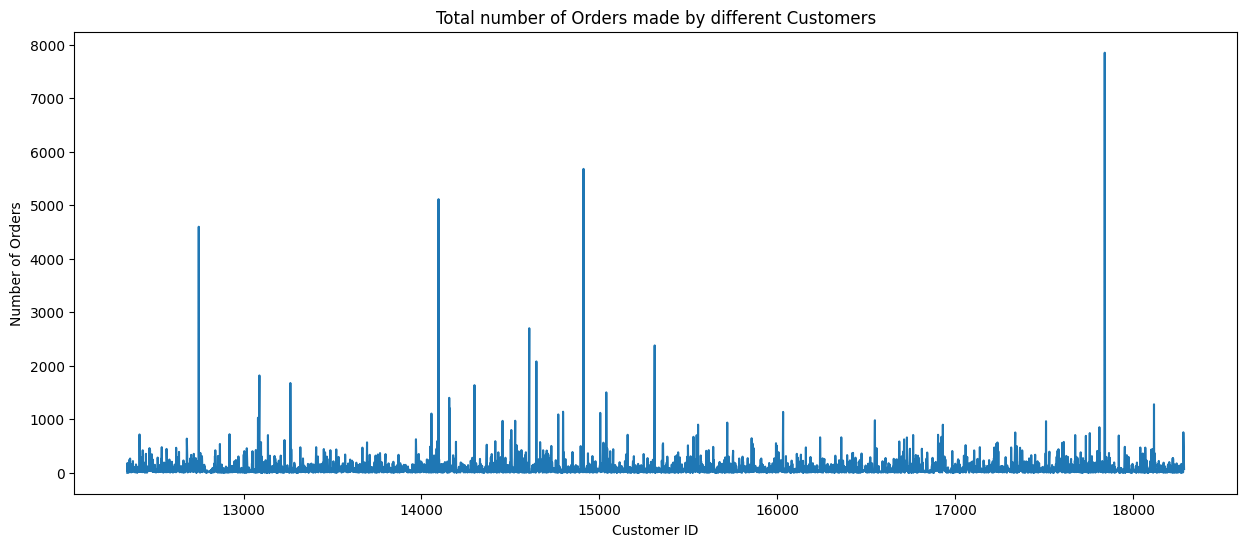

In [38]:
plt.subplots(figsize=(15,6))

plt.plot(orders.cust_id, orders.invoice_num)

plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Total number of Orders made by different Customers')

plt.show()

In [39]:
money_spent = df1.groupby(by = ['cust_id', 'country'], as_index = False)['amt_spent'].sum()

In [40]:
money_spent.sort_values(by = 'amt_spent', ascending = False).head(10)

,cust_id,country,amt_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


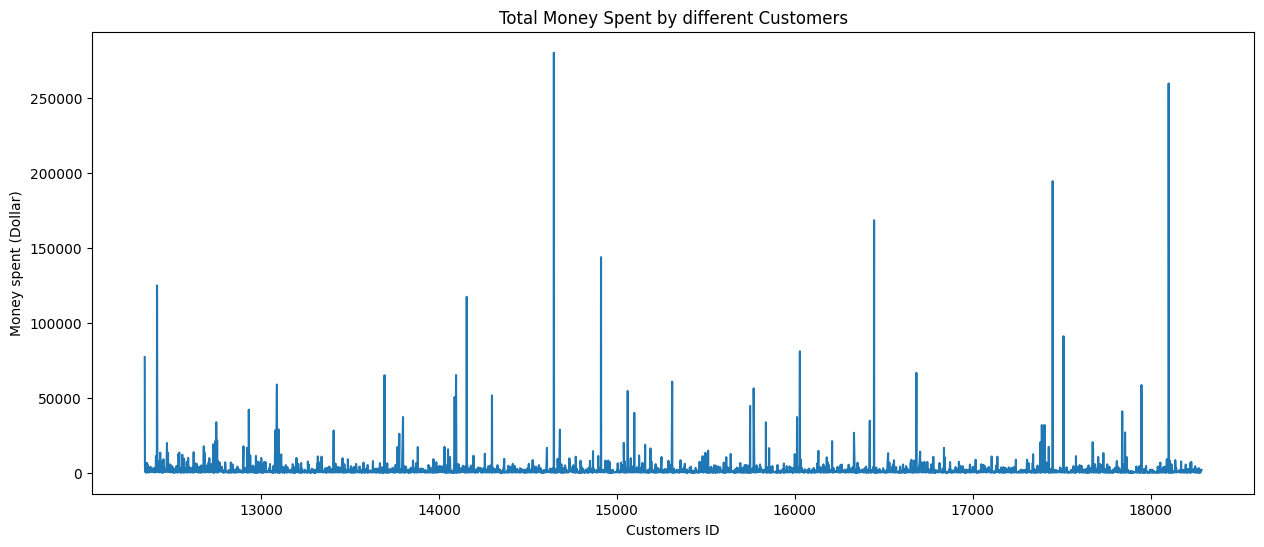

In [41]:
plt.subplots(figsize=(15,6))

plt.plot(money_spent.cust_id, money_spent.amt_spent)

plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Total Money Spent by different Customers')

plt.show()

In [42]:
color = sns.color_palette()

In [43]:
df1.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()


year_month
[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: count, dtype: int64

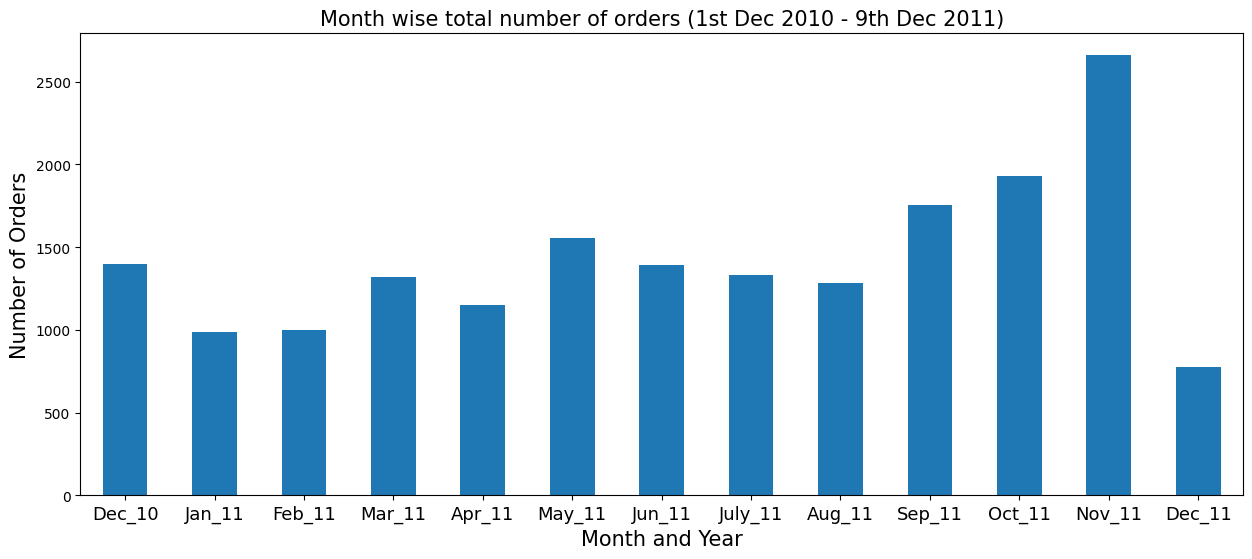

In [44]:
ax = df1.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',color = color[0],figsize = (15,6))

ax.set_xlabel('Month and Year',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Month wise total number of orders (1st Dec 2010 - 9th Dec 2011)', fontsize = 15)

t = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11')

ax.set_xticklabels(t, rotation='horizontal', fontsize=13)

plt.show()

In [45]:
df1.groupby('invoice_num')['day'].unique().value_counts().sort_index()

day
[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: count, dtype: int64

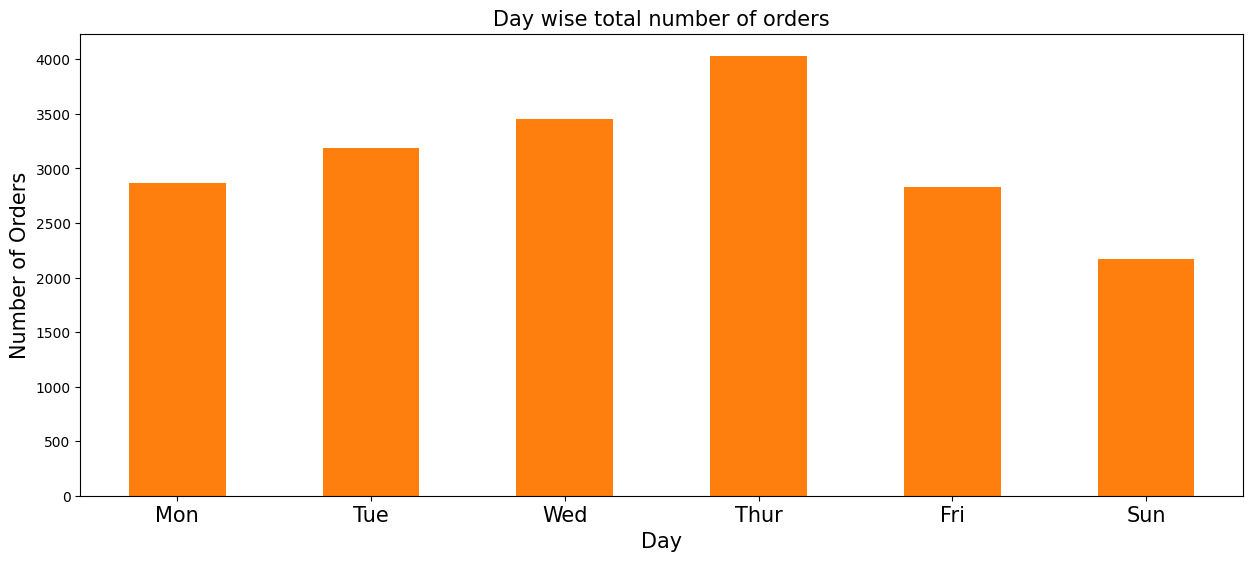

In [46]:
ax = df1.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind = 'bar',color=color[1],figsize=(15,6))

ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Day wise total number of orders',fontsize=15)
d = ('Mon','Tue','Wed','Thur','Fri','Sun')
ax.set_xticklabels(d, rotation='horizontal', fontsize=15)
plt.show()

In [47]:
df1.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

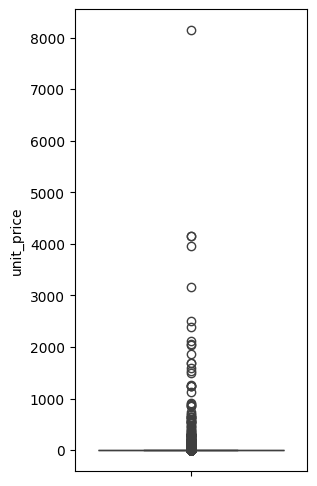

In [48]:
# check the distribution of unit price
plt.subplots(figsize = (3,6))

sns.boxplot(df1.unit_price)
plt.show()

In [49]:
df_free = df1[df1.unit_price == 0]

In [50]:
len(df_free)

40

In [51]:
df_free.year_month.value_counts().sort_index()

year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

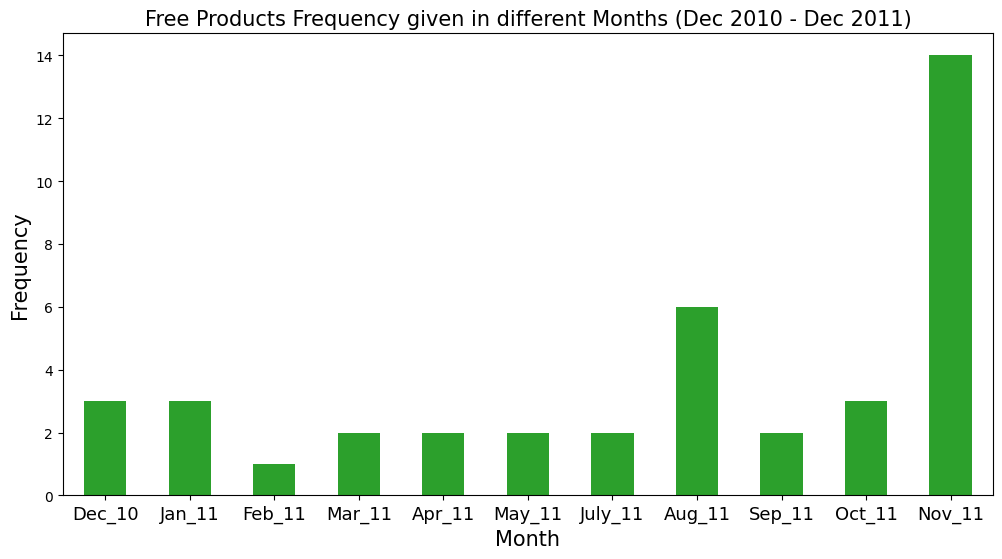

In [52]:
ax = df_free.year_month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6), color=color[2])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Free Products Frequency given in different Months (Dec 2010 - Dec 2011)',fontsize=15)

m = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11')

ax.set_xticklabels(m, rotation='horizontal', fontsize=13)
plt.show()

In [53]:
df1.groupby('country')['invoice_num'].count().sort_values().head()

country
Saudi Arabia       9
Bahrain           17
Czech Republic    25
Brazil            32
Lithuania         35
Name: invoice_num, dtype: int64

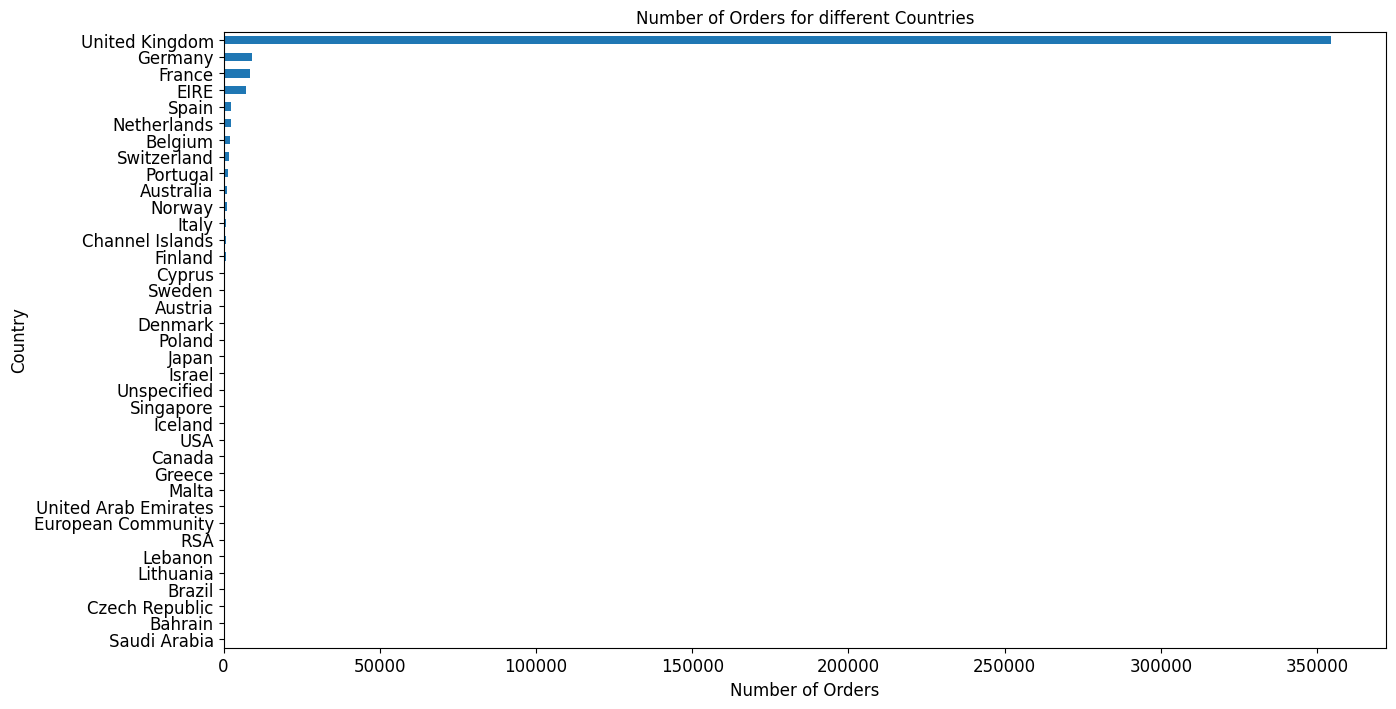

In [54]:
group_country_orders = df1.groupby('country')['invoice_num'].count().sort_values()


plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

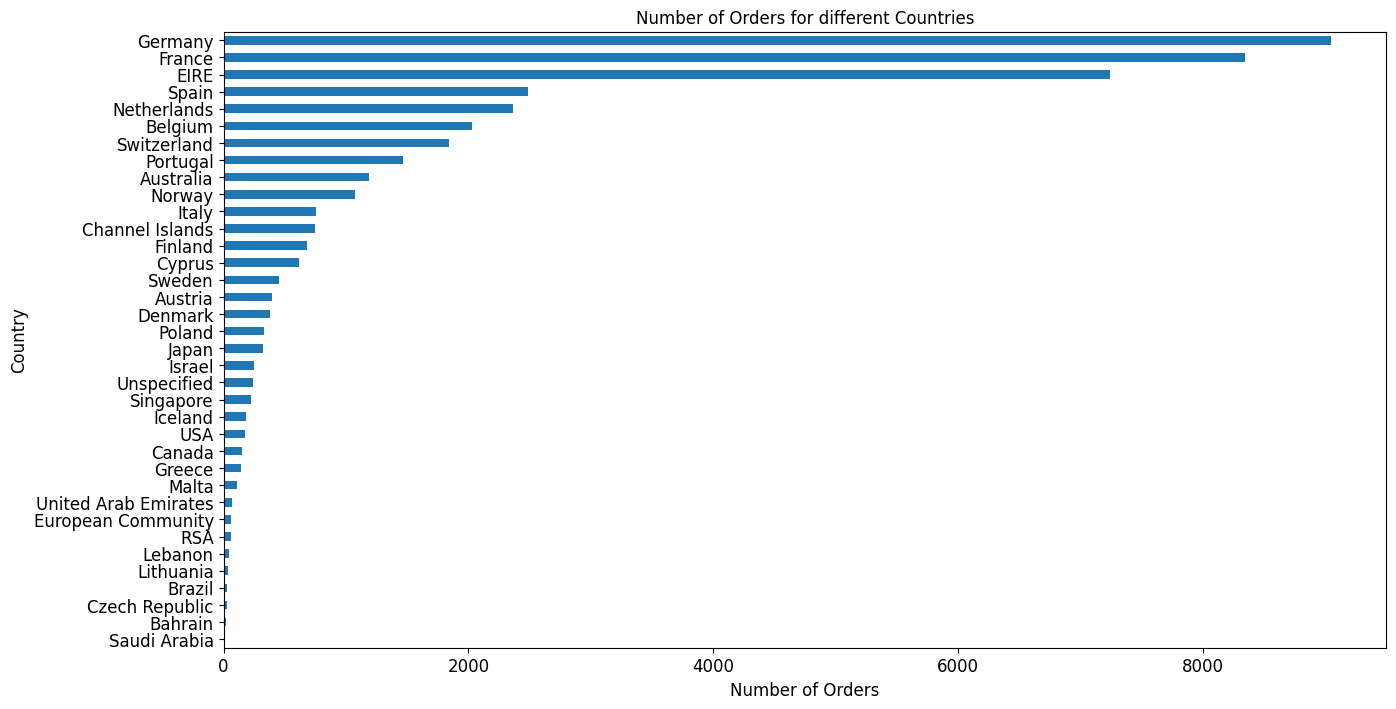

In [55]:
del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [56]:
temp = df1[['cust_id', 'invoice_num', 'country']]

In [57]:
temp.head()

,cust_id,invoice_num,country
0,17850,536365,United Kingdom
1,17850,536365,United Kingdom
2,17850,536365,United Kingdom
3,17850,536365,United Kingdom
4,17850,536365,United Kingdom


In [58]:
temp = temp.groupby(['cust_id', 'invoice_num', 'country']).count()
temp

Empty DataFrame
Columns: []
Index: [(12346, 541431, United Kingdom), (12347, 537626, Iceland), (12347, 542237, Iceland), (12347, 549222, Iceland), (12347, 556201, Iceland), (12347, 562032, Iceland), (12347, 573511, Iceland), (12347, 581180, Iceland), (12348, 539318, Finland), (12348, 541998, Finland), (12348, 548955, Finland), (12348, 568172, Finland), (12349, 577609, Italy), (12350, 543037, Norway), (12352, 544156, Norway), (12352, 545323, Norway), (12352, 545332, Norway), (12352, 546869, Norway), (12352, 547390, Norway), (12352, 567505, Norway), (12352, 568699, Norway), (12352, 574275, Norway), (12353, 553900, Bahrain), (12354, 550911, Spain), (12355, 552449, Bahrain), (12356, 541430, Portugal), (12356, 549435, Portugal), (12356, 576895, Portugal), (12357, 574740, Switzerland), (12358, 559707, Austria), (12358, 581232, Austria), (12359, 540946, Cyprus), (12359, 543370, Cyprus), (12359, 555477, Cyprus), (12359, 571034, Cyprus), (12360, 554132, Austria), (12360, 563749, Austria), (12360, 571705, Austria), (12361, 545017, Belgium), (12362, 544203, Belgium), (12362, 551346, Belgium), (12362, 559295, Belgium), (12362, 563037, Belgium), (12362, 568651, Belgium), (12362, 570667, Belgium), (12362, 572887, Belgium), (12362, 573173, Belgium), (12362, 574329, Belgium), (12362, 580979, Belgium), (12363, 549687, Unspecified), (12363, 563947, Unspecified), (12364, 563854, Belgium), (12364, 567897, Belgium), (12364, 573401, Belgium), (12364, 580152, Belgium), (12365, 544574, Cyprus), (12365, 544578, Cyprus), (12367, 580716, Denmark), (12370, 538826, Cyprus), (12370, 539330, Austria), (12370, 546236, Cyprus), (12370, 571905, Cyprus), (12371, 570521, Switzerland), (12371, 572770, Switzerland), (12372, 544157, Denmark), (12372, 552731, Denmark), (12372, 568872, Denmark), (12373, 542887, Austria), (12374, 576345, Austria), (12375, 565333, Finland), (12375, 579281, Finland), (12377, 539488, Switzerland), (12377, 542586, Switzerland), (12378, 562046, Switzerland), (12379, 557789, Belgium), (12379, 567196, Belgium), (12380, 555739, Belgium), (12380, 567928, Belgium), (12380, 571187, Belgium), (12380, 577180, Belgium), (12381, 563100, Norway), (12381, 570681, Norway), (12381, 570725, Norway), (12381, 574694, Norway), (12381, 580638, Norway), (12383, 539840, Belgium), (12383, 540971, Belgium), (12383, 546434, Belgium), (12383, 550284, Belgium), (12383, 555928, Belgium), (12384, 562882, Switzerland), (12384, 575734, Switzerland), (12386, 537676, Australia), (12386, 540280, Australia), (12388, 541271, Australia), (12388, 543357, Australia), (12388, 546135, Australia), (12388, 560033, Australia), (12388, 568145, Australia), (12388, 578459, Australia), ...]

[18536 rows x 0 columns]

In [59]:
temp = temp.reset_index(drop = False)
temp

,cust_id,invoice_num,country
0,12346,541431,United Kingdom
1,12347,537626,Iceland
2,12347,542237,Iceland
3,12347,549222,Iceland
4,12347,556201,Iceland
...,...,...,...
18531,18283,579673,United Kingdom
18532,18283,580872,United Kingdom
18533,18287,554065,United Kingdom
18534,18287,570715,United Kingdom


In [60]:
countries = temp['country'].value_counts()

In [61]:
countries

country
United Kingdom          16649
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                95
Spain                      90
Portugal                   57
Australia                  57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Israel                      5
Malta                       5
USA                         5
Greece                      5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
RS

In [62]:
''' so in the dataset if we observe, the same customer, in the same time and date has purchases different stocks (represented by stockcode column).
    those purchases are shown in multiple records, forming redundant values for country if chosen for understanding the number of orders.
    so inorder to remove the redundant records, we chose to do this to the country.
    Getting only the orders that are made seperately in a country by different customers at different time.
'''

data = dict(
    type = 'choropleth',
    locations = countries.index,
    locationmode = 'country names', 
    z = countries,
    text = countries.index, 
    colorbar = {'title':'Order nb.'},
            
    colorscale=[[0, 'rgb(224,255,255)'],
                [0.01, 'rgb(166,206,227)'], 
                [0.02, 'rgb(31,120,180)'],
                [0.03, 'rgb(178,223,138)'], 
                [0.05, 'rgb(51,160,44)'],
                [0.10, 'rgb(251,154,153)'], 
                [0.20, 'rgb(255,255,0)'],
                [1, 'rgb(227,26,28)']
    ],    
    reversescale = False
)


layout = dict(
    title = 'Number of orders per country',
    geo = dict(showframe = True, projection = {'type':'mercator'})
)


choromap = go.Figure(
    data = [data], layout = layout
)

iplot(choromap, validate=False)

In [63]:
df1.groupby('country')['amt_spent'].sum().sort_values(ascending =False).head()

country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: amt_spent, dtype: float64

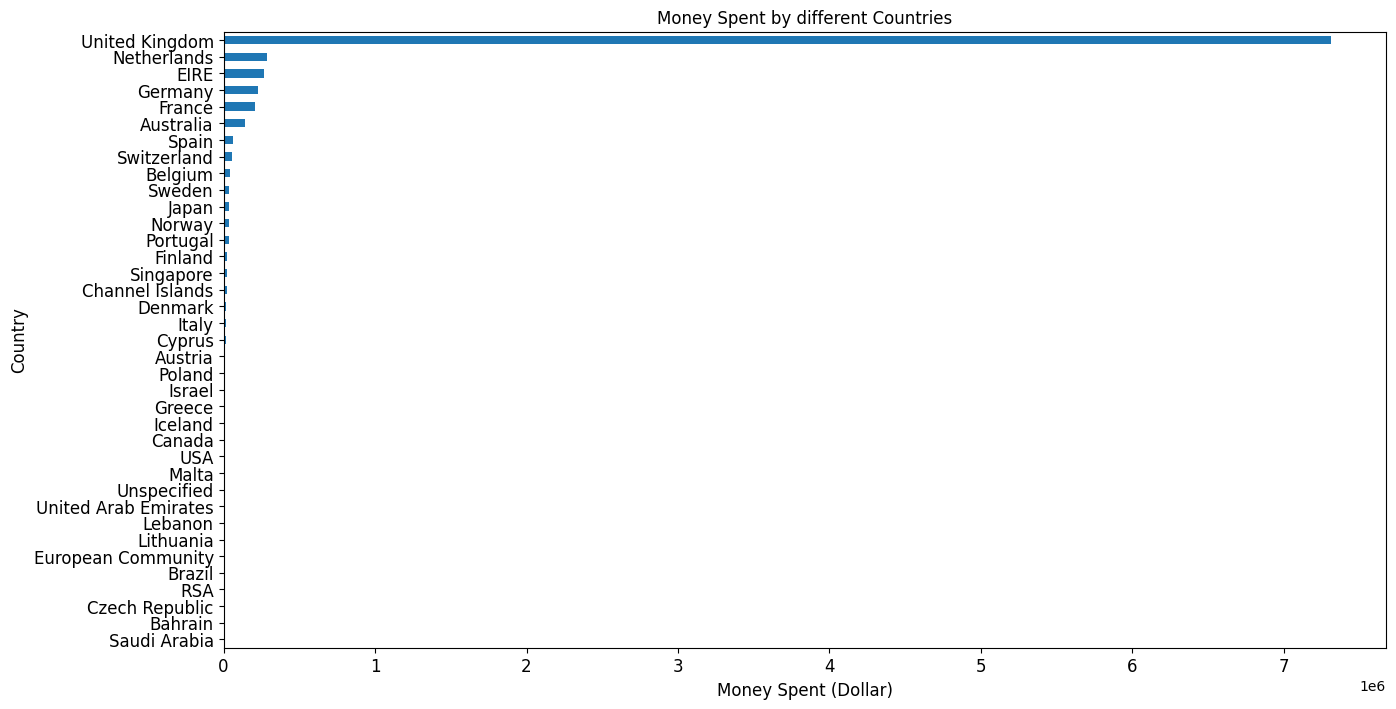

In [64]:
group_country_amount_spent = df1.groupby('country')['amt_spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

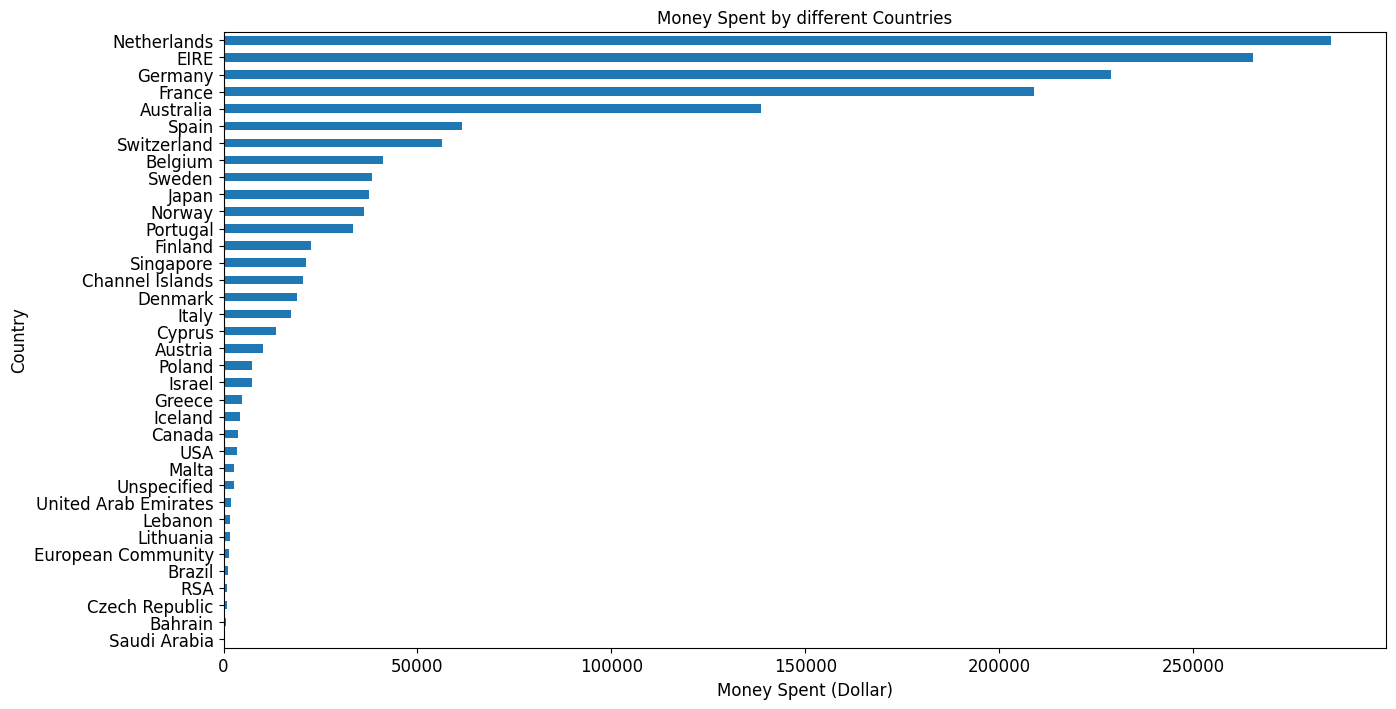

In [65]:
del group_country_amount_spent['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [66]:
products = len(df1['stock_code'].value_counts())
transactions = len(df1['invoice_num'].value_counts())
customers = len(df1['cust_id'].value_counts())

In [67]:
d1 = {'Products': products, 'Transactions': transactions, 'Customers': customers}

In [68]:
d1

{'Products': 3665, 'Transactions': 18536, 'Customers': 4339}

In [69]:
df_pro_txns_cust = pd.DataFrame(d1, index = ['Quantity'])
df_pro_txns_cust

,Products,Transactions,Customers
Quantity,3665,18536,4339


In [70]:
temp1 = df1.groupby(by = ['cust_id', 'invoice_num'], as_index = False)['invoice_date'].count()


In [71]:
temp1

,cust_id,invoice_num,invoice_date
0,12346,541431,1
1,12347,537626,31
2,12347,542237,29
3,12347,549222,24
4,12347,556201,18
...,...,...,...
18531,18283,579673,52
18532,18283,580872,50
18533,18287,554065,29
18534,18287,570715,38


In [72]:
temp1.rename(columns = {'invoice_date' : 'Number of products'})

,cust_id,invoice_num,Number of products
0,12346,541431,1
1,12347,537626,31
2,12347,542237,29
3,12347,549222,24
4,12347,556201,18
...,...,...,...
18531,18283,579673,52
18532,18283,580872,50
18533,18287,554065,29
18534,18287,570715,38


In [73]:
nb_products_per_basket = temp1.rename(columns = {'invoice_date' : 'Number of products'})
nb_products_per_basket.sort_values('cust_id')


,cust_id,invoice_num,Number of products
0,12346,541431,1
3,12347,549222,24
2,12347,542237,29
1,12347,537626,31
4,12347,556201,18
...,...,...,...
18518,18283,541854,45
18520,18283,550957,56
18534,18287,570715,38
18533,18287,554065,29


In [74]:
list_special_codes = df1[df1['stock_code'].str.contains('^[a-zA-Z]+', regex = True)]

In [75]:
list_special_codes['stock_code'].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

* POST = POSTAGE
* D = Discount
* C2 = CARRIAGE
* M = Manual
* BANK CHARGES = Bank Charges
* PADS = PADS TO MATCH ALL CUSHIONS
* DOT = DOTCOM POSTAGE